In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import html

In [ ]:
df = pd.read_csv('/content/Restaurant_revenue (1).csv')
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df['Cuisine_Type']=Le.fit_transform(df['Cuisine_Type'])

In [ ]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,2,36.236133,0,45,350.912040
1,24,40.020077,4.577892,1,17.952562,0,36,221.319091
2,81,41.981485,4.652911,2,22.600420,1,91,326.529763
3,70,43.005307,4.416053,1,18.984098,1,59,348.190573
4,30,17.456199,3.475052,1,12.766143,1,30,185.009121


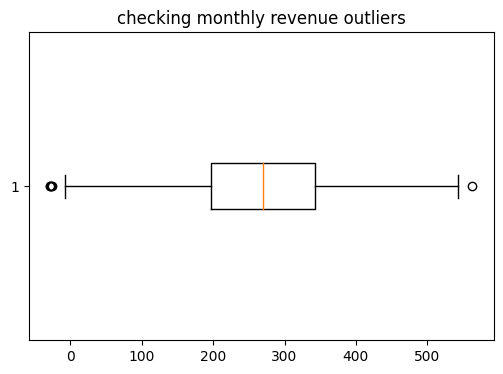

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Monthly_Revenue'],vert=False)
plt.title('checking monthly revenue outliers')
plt.show()

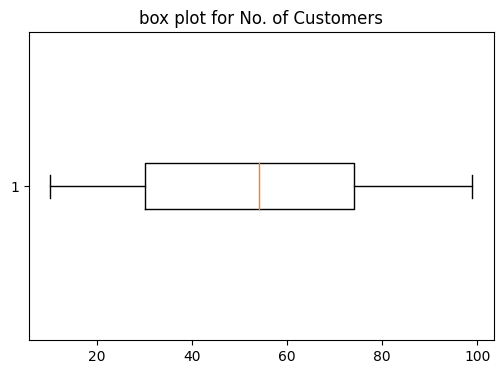

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Number_of_Customers'],vert=False)
plt.title('box plot for No. of Customers')
plt.show()


In [ ]:
#dealing with outliers using winsorize method
from scipy.stats import mstats
df['Monthly_Revenue']=mstats.winsorize(df['Monthly_Revenue'],limits=[0.1,0.1])

In [ ]:
df['Monthly_Revenue'].max()

404.6011165527136

In [ ]:
#checking mathematical statistics
df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,1.506000,29.477085,0.497000,49.837000,269.086759
std,26.364914,11.278760,5.845586,1.123934,11.471686,0.500241,29.226334,87.789997
min,10.000000,10.009501,0.003768,0.000000,10.037177,0.000000,0.000000,133.475475
25%,30.000000,20.396828,4.690724,0.000000,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,2.000000,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,2.250000,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,3.000000,49.900725,1.000000,99.000000,404.601117


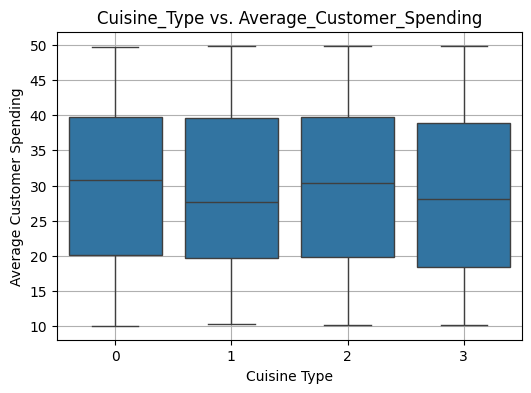

In [ ]:
#Cuisine_Type vs. Average_Customer_Spending
plt.figure(figsize=(6,4))
sns.boxplot(x='Cuisine_Type',y='Average_Customer_Spending',data=df)
plt.title('Cuisine_Type vs. Average_Customer_Spending')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Customer Spending')
plt.grid(True)
plt.show()

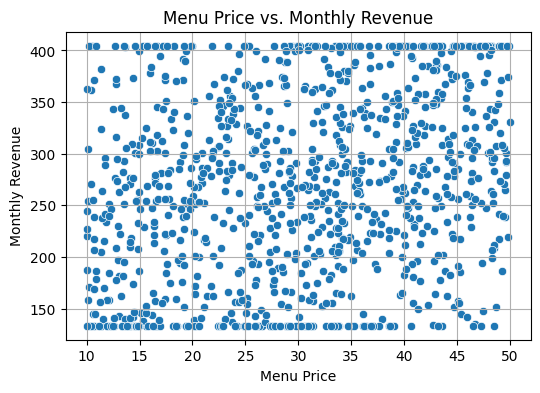

In [ ]:
#Menu_Price vs. Monthly_Revenue
plt.figure(figsize=(6,4))
sns.scatterplot(x='Menu_Price',y='Monthly_Revenue',data=df)
plt.title('Menu Price vs. Monthly Revenue')
plt.xlabel('Menu Price')
plt.ylabel('Monthly Revenue')
plt.grid(True)
plt.show()

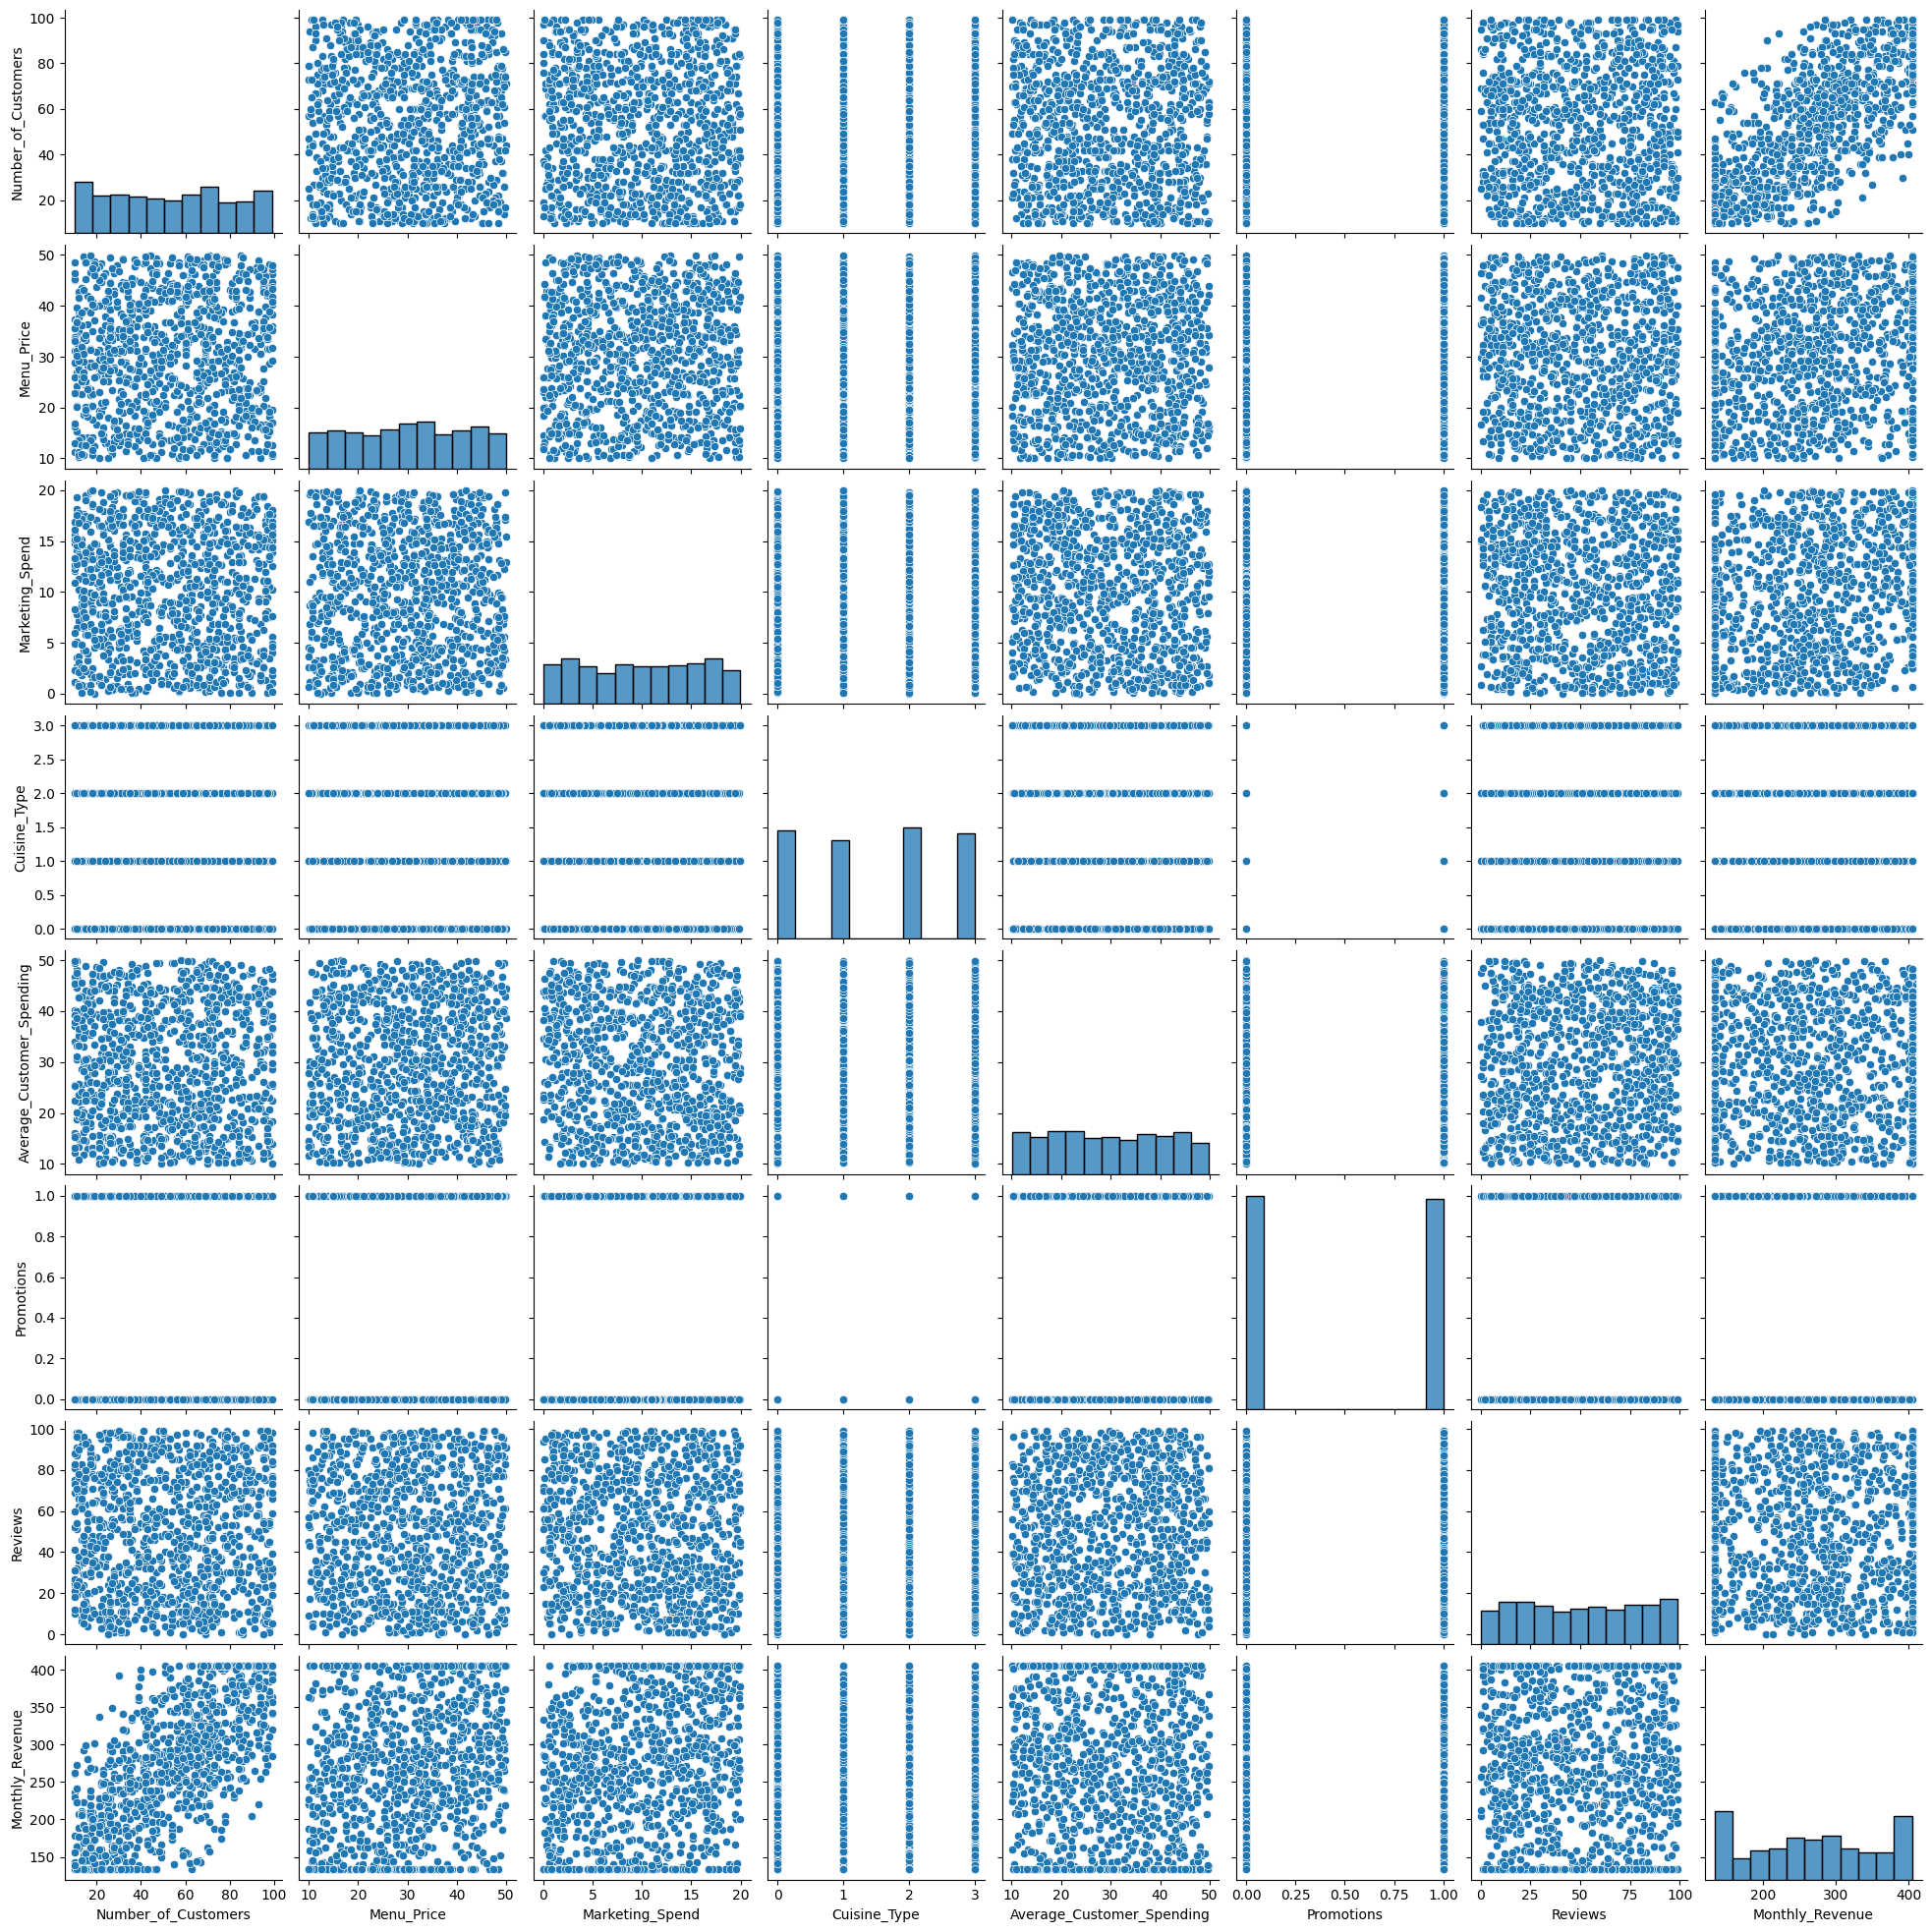

In [ ]:
sns.pairplot(df)

In [ ]:
#splitting the data into X and Y
X= df.drop('Monthly_Revenue' ,axis = 1)
X

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews
0,61,43.117635,12.663793,2,36.236133,0,45
1,24,40.020077,4.577892,1,17.952562,0,36
2,81,41.981485,4.652911,2,22.600420,1,91
3,70,43.005307,4.416053,1,18.984098,1,59
4,30,17.456199,3.475052,1,12.766143,1,30
...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,2,19.033585,1,40
996,31,20.615496,5.822885,3,17.040990,0,57
997,69,17.110656,4.141898,2,44.649315,0,55
998,73,37.664722,3.046556,2,27.767358,0,23


In [ ]:
Y = df['Monthly_Revenue']
Y

0      350.912040
1      221.319091
2      326.529763
3      348.190573
4      185.009121
          ...    
995    249.312034
996    133.475475
997    312.212552
998    272.482204
999    379.973072
Name: Monthly_Revenue, Length: 1000, dtype: float64

In [ ]:
#spltting into training and testing dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

In [ ]:
#linear regression model


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)

mse_lr = mean_squared_error(y_test,y_pred)
r2_lr  =r2_score(y_test,y_pred)

print('MSE: ',mse_lr)
print('R2 score: ',r2_lr)

MSE:  2628.3466330712895
R2 score:  0.6372071658711386


In [ ]:
#random forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

mse_rf = mean_squared_error(y_test,y_pred)
r2_rf= r2_score(y_test,y_pred)

print('MSE: ',mse_rf)
print('R2 score: ',r2_rf)

MSE:  3019.102374274506
R2 score:  0.5832708315157324


In [ ]:
#decision tree model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(x_train,y_train)
y_pred = decision_tree_model.predict(x_test)

mse_dt = mean_squared_error(y_test,y_pred)
r2_dt =r2_score(y_test,y_pred)

print('MSE: ',mse_dt)
print('R2 score: ',r2_dt)



MSE:  4793.078456013283
R2 score:  0.3384074629353191


In [ ]:
#gradient boost model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()
gbr_model.fit(x_train,y_train)
y_pred = gbr_model.predict(x_test)

mse_gbr = mean_squared_error(y_test,y_pred)
r2_gbr =r2_score(y_test,y_pred)

print('MSE: ',mse_gbr)
print('R2 score: ', r2_gbr)

MSE:  2993.421673302073
R2 score:  0.5868155596619276


In [ ]:
#adaboost model

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ada_model =AdaBoostRegressor()
ada_model.fit(x_train,y_train)
y_pred = gbr_model.predict(x_test)

mse_ada = mean_squared_error(y_test,y_pred)
r2_ada =r2_score(y_test,y_pred)

print('MSE: ',mse_ada)
print('R2 score: ', r2_ada)

MSE:  2993.421673302073
R2 score:  0.5868155596619276


In [ ]:
#support vector regressor

In [ ]:
from sklearn.svm import SVR

svm_model =SVR()
svm_model.fit(x_train,y_train)
y_pred = gbr_model.predict(x_test)

mse_svm = mean_squared_error(y_test,y_pred)
r2_svm=r2_score(y_test,y_pred)

print('MSE: ',mse_svm)
print('R2 score: ', r2_svm)

MSE:  2993.421673302073
R2 score:  0.5868155596619276


In [ ]:
#lasso regression model

In [ ]:
from sklearn.linear_model import Lasso

Lasso_model = Lasso()
Lasso_model.fit(x_train,y_train)
y_pred = Lasso_model.predict(x_test)

mse_Lasso= mean_squared_error(y_test,y_pred)
r2_Lasso=r2_score(y_test,y_pred)

print('MSE: ',mse_Lasso)
print('R2 score: ', r2_Lasso)

MSE:  2627.7586369225337
R2 score:  0.6372883274601695


In [ ]:
pred = Lasso_model.predict([[61,43.117635487099676,12.663792520269281,0,36.23613252393598,0,45]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [ ]:
pred

array([316.75485836])

In [ ]:
pred = Lasso_model.predict([[61,43.117635487099676,12.663792520269281,0,36.23613252393598,0,45]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [ ]:
pred

array([316.75485836])

In [ ]:
model = pd.DataFrame({'Model':["Linear Regression", 'Decision Tree Regressor','RandomForest Regression',
                              'Support vector machine','GradientiBoosting Regression','AdaBoost Regression',
                                'Lasso Regression'],
                      'Score' :[r2_lr,r2_dt,r2_rf,r2_svm,r2_gbr,r2_ada,r2_Lasso],
                      'MSE': [mse_lr,mse_dt,mse_rf,mse_svm,mse_gbr,mse_ada,mse_Lasso]
                    })

In [ ]:
model

,Model,Score,MSE
0,Linear Regression,0.637207,2628.346633
1,Decision Tree Regressor,0.338407,4793.078456
2,RandomForest Regression,0.583271,3019.102374
3,Support vector machine,0.586816,2993.421673
4,GradientiBoosting Regression,0.586816,2993.421673
5,AdaBoost Regression,0.586816,2993.421673
6,Lasso Regression,0.637288,2627.758637


In [ ]:
import pickle
pickle.dump(Lasso_model,open('Restaurant_revenue.pkl','wb'))